In [1]:
import os
import requests

def download_file_to_cwd(url, file_name=None):
    try:
        # Get the current working directory
        current_dir = os.getcwd()

        # create downloads directory
        downloads_dir = os.path.join(current_dir, 'downloads')
        os.makedirs(downloads_dir, exist_ok=True)

        # Get the file name from the URL if not provided
        if file_name is None:
            file_name = url.split("/")[-1].split("?")[0]

        # Full path to save the file
        save_path = os.path.join(downloads_dir, file_name)

        # Send a GET request to fetch the file
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise an error for bad status codes

        # Write the file to the specified directory
        with open(save_path, 'wb') as file:
            for chunk in response.iter_content(chunk_size=1024):
                file.write(chunk)

        print(f"File downloaded successfully: {save_path}")
        return current_dir,save_path

    except requests.exceptions.RequestException as e:
        print(f"Error downloading the file: {e}")
        return None

# Example Usage
url = "https://zenodo.org/records/8196385/files/OpenStack.tar.gz?download=1"  # Replace with your URL
current_dir,save_path=download_file_to_cwd(url)
print(f"File is saved in the path {save_path}")
print(f"File is saved in the path {current_dir}")


File downloaded successfully: /content/downloads/OpenStack.tar.gz
File is saved in the path /content/downloads/OpenStack.tar.gz
File is saved in the path /content


In [2]:
import tarfile
import re
 # Get the file name from the URL if not provided
extracted_files="extracted_files"

output_dir= os.path.join(current_dir, extracted_files)
print(output_dir)

with tarfile.open(save_path, "r:gz") as tar:
    tar.extractall(path=output_dir)
print("Extraction completed.")

# Step 3: List the contents of the extracted folder
extracted_files = os.listdir(output_dir)
print("Extracted files:", extracted_files)

# Step 4: Count the number of records in each file
print("\nNumber of records in each file:")
for file_name in extracted_files:
    file_path = os.path.join(output_dir, file_name)
    if os.path.isfile(file_path):  # Only process regular files
        try:
            with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
                line_count = sum(1 for line in f)
            print(f"{file_name}: {line_count} records")
        except Exception as e:
            print(f"Error processing {file_name}: {e}")



/content/extracted_files
Extraction completed.
Extracted files: ['openstack_normal2.log', 'anomaly_labels.txt', 'openstack_abnormal.log', 'openstack_normal1.log']

Number of records in each file:
openstack_normal2.log: 137074 records
anomaly_labels.txt: 6 records
openstack_abnormal.log: 18434 records
openstack_normal1.log: 52312 records


In [5]:
import os
import tarfile
import requests
import pandas as pd
import re
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
# File statistics
file_stats = []
for file_name in extracted_files:
    file_path = os.path.join(output_dir, file_name)
    if os.path.isfile(file_path):
        with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
            lines = f.readlines()
            line_count = len(lines)
            file_size = os.path.getsize(file_path) / 1024  # Size in KB
            sample_lines = lines[:5]  # Inspect first 5 lines
            file_stats.append({
                "file_name": file_name,
                "line_count": line_count,
                "file_size_kb": round(file_size, 2),
                "sample_lines": sample_lines
            })
df_stats = pd.DataFrame(file_stats)
print("\nFile Statistics:")
print(df_stats[["file_name", "line_count", "file_size_kb"]])

# Display sample lines from each file
for index, row in df_stats.iterrows():
    print(f"\nSample lines from {row['file_name']}:")
    for line in row["sample_lines"]:
        print(line.strip())

#print(df_stats["file_name"])
# Analyze log components in the first file
if not df_stats.empty:
    filer_obj=[col for col in df_stats["file_name"] if '_normal' in col]
    print(filer_obj[0])
    #first_file_path = os.path.join(output_dir, filer_obj)
    #with open(first_file_path, "r", encoding="utf-8", errors="ignore") as f:
     #   logs = f.readlines()

    # Extract log levels
    #log_levels = [re.search(r'\b(INFO|WARNING|ERROR|DEBUG|CRITICAL)\b', log) for log in logs]
    #log_levels = [match.group(0) for match in log_levels if match]


File Statistics:
                file_name  line_count  file_size_kb
0   openstack_normal2.log      137074      39557.00
1      anomaly_labels.txt           6          0.24
2  openstack_abnormal.log       18434       5308.71
3   openstack_normal1.log       52312      15136.32

Sample lines from openstack_normal2.log:
nova-compute.log.1.2017-05-17_12:02:35 2017-05-16 15:15:54.960 2931 INFO nova.compute.manager [req-7a738b84-d574-43c6-a6c4-68c164365101 e887c6de57b5411cb33a5943be2d3c1a 54fadb412c4e40cdbaed9335e4c35a9e - - -] [instance: 0f079bdd-4117-4f6a-8b49-f3fb720b483c] Took 0.54 seconds to deallocate network for instance.
nova-compute.log.1.2017-05-17_12:02:35 2017-05-16 15:15:55.746 2931 WARNING nova.virt.libvirt.imagecache [req-addc1839-2ed5-4778-b57e-5854eb7b8b09 - - - - -] Unknown base file: /var/lib/nova/instances/_base/a489c868f0c37da93b76227c91bb03908ac0e742
nova-compute.log.1.2017-05-17_12:02:35 2017-05-16 15:15:55.747 2931 INFO nova.virt.libvirt.imagecache [req-addc1839-2ed5

In [6]:
print(log_levels)

NameError: name 'log_levels' is not defined


File Statistics:
                file_name  line_count  file_size_kb
0   openstack_normal2.log      137074      39557.00
1      anomaly_labels.txt           6          0.24
2  openstack_abnormal.log       18434       5308.71
3   openstack_normal1.log       52312      15136.32

Sample lines from openstack_normal2.log:
nova-compute.log.1.2017-05-17_12:02:35 2017-05-16 15:15:54.960 2931 INFO nova.compute.manager [req-7a738b84-d574-43c6-a6c4-68c164365101 e887c6de57b5411cb33a5943be2d3c1a 54fadb412c4e40cdbaed9335e4c35a9e - - -] [instance: 0f079bdd-4117-4f6a-8b49-f3fb720b483c] Took 0.54 seconds to deallocate network for instance.
nova-compute.log.1.2017-05-17_12:02:35 2017-05-16 15:15:55.746 2931 WARNING nova.virt.libvirt.imagecache [req-addc1839-2ed5-4778-b57e-5854eb7b8b09 - - - - -] Unknown base file: /var/lib/nova/instances/_base/a489c868f0c37da93b76227c91bb03908ac0e742
nova-compute.log.1.2017-05-17_12:02:35 2017-05-16 15:15:55.747 2931 INFO nova.virt.libvirt.imagecache [req-addc1839-2ed5

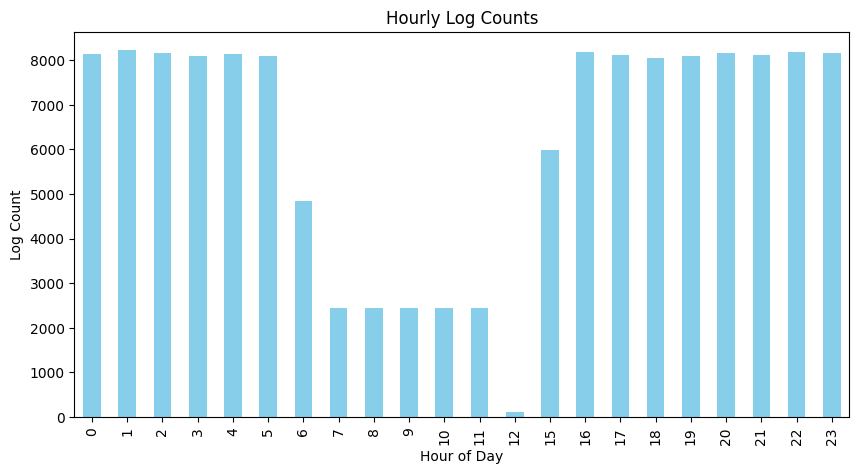


Most Frequent Words:
[('-', 361592), ('INFO', 134916), ('-]', 127082), ('2931', 71143), ('2017-05-16', 71074), ('54fadb412c4e40cdbaed9335e4c35a9e', 67688), ('113d3a99c3da401fbd62cc2caa5b96d2', 67687), ('2017-05-17', 66042), ('nova-api.log.1.2017-05-17_12:02:19', 65224), ('HTTP/1.1"', 62693)]

Entity Counts:
Total UUIDs: 131089
Total IP Addresses: 62693

Service-Level Log Counts:
nova: 137074
neutron: 0
cinder: 0
keystone: 3
glance: 0
swift: 0
heat: 0

Total Anomalous Logs: 170

Sample Anomalous Logs:
['nova-compute.log.1.2017-05-17_12:02:35 2017-05-16 16:30:35.360 2931 ERROR oslo_service.periodic_task [req-addc1839-2ed5-4778-b57e-5854eb7b8b09 - - - - -] Error during ComputeManager._run_image_cache_manager_pass\n', 'nova-compute.log.1.2017-05-17_12:02:35 2017-05-16 16:30:35.360 2931 ERROR oslo_service.periodic_task Traceback (most recent call last):\n', 'nova-compute.log.1.2017-05-17_12:02:35 2017-05-16 16:30:35.360 2931 ERROR oslo_service.periodic_task   File "/usr/lib/python2.7/dist-

In [7]:
import os
import tarfile
import requests
import pandas as pd
import re
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
# File statistics
file_stats = []
for file_name in extracted_files:
    file_path = os.path.join(output_dir, file_name)
    if os.path.isfile(file_path):
        with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
            lines = f.readlines()
            line_count = len(lines)
            file_size = os.path.getsize(file_path) / 1024  # Size in KB
            sample_lines = lines[:5]  # Inspect first 5 lines
            file_stats.append({
                "file_name": file_name,
                "line_count": line_count,
                "file_size_kb": round(file_size, 2),
                "sample_lines": sample_lines
            })
df_stats = pd.DataFrame(file_stats)
print("\nFile Statistics:")
print(df_stats[["file_name", "line_count", "file_size_kb"]])

# Display sample lines from each file
for index, row in df_stats.iterrows():
    print(f"\nSample lines from {row['file_name']}:")
    for line in row["sample_lines"]:
        print(line.strip())

# Analyze log components in the first file
if not df_stats.empty:
    filer_obj=[col for col in df_stats["file_name"] if '_normal' in col]
    first_file_path = os.path.join(output_dir, filer_obj[0])
    with open(first_file_path, "r", encoding="utf-8", errors="ignore") as f:
        logs = f.readlines()

    # Extract log levels
    log_levels = [re.search(r'\b(INFO|WARNING|ERROR|DEBUG|CRITICAL)\b', log) for log in logs]
    log_levels = [match.group(0) for match in log_levels if match]

    # Extract timestamps
    datepattern = re.compile("\w{3}, \d{2} \w{3} \d{4} \d{2}:\d{2}:\d{2} \w{3}")
    timestamps = [re.search(r'\b(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2})\b', log) for log in logs]
    timestamps = [datetime.strptime(match.group(1), '%Y-%m-%d %H:%M:%S') for match in timestamps if match]

    # Log Level Counts
    log_level_counts = pd.Series(log_levels).value_counts()
    print("\nLog Level Counts:")
    print(log_level_counts)

    # Time-based patterns
    df_timestamps = pd.DataFrame({'timestamp': timestamps})
    df_timestamps['hour'] = df_timestamps['timestamp'].dt.hour
    hourly_counts = df_timestamps['hour'].value_counts().sort_index()
    print("\nHourly Log Counts:")
    print(hourly_counts)

    # Plot hourly log counts
    plt.figure(figsize=(10, 5))
    hourly_counts.plot(kind='bar', color='skyblue', title='Hourly Log Counts')
    plt.xlabel('Hour of Day')
    plt.ylabel('Log Count')
    plt.show()

    # Frequent log messages
    word_counts = Counter(" ".join(logs).split())
    print("\nMost Frequent Words:")
    print(word_counts.most_common(10))

    # Entity Extraction
    uuids = [re.search(r'\b[0-9a-fA-F-]{36}\b', log).group(0) for log in logs if re.search(r'\b[0-9a-fA-F-]{36}\b', log)]
    ip_addresses = [re.search(r'\b\d{1,3}(?:\.\d{1,3}){3}\b', log).group(0) for log in logs if re.search(r'\b\d{1,3}(?:\.\d{1,3}){3}\b', log)]
    print("\nEntity Counts:")
    print(f"Total UUIDs: {len(uuids)}")
    print(f"Total IP Addresses: {len(ip_addresses)}")

    # Service-Level Statistics
    services = ['nova', 'neutron', 'cinder', 'keystone', 'glance', 'swift', 'heat']
    service_counts = {service: sum(1 for log in logs if service in log) for service in services}
    print("\nService-Level Log Counts:")
    for service, count in service_counts.items():
        print(f"{service}: {count}")

    # Anomaly Detection
    anomaly_keywords = ["failed", "timeout", "critical", "error"]
    anomalous_logs = [log for log in logs if any(keyword in log.lower() for keyword in anomaly_keywords)]
    print(f"\nTotal Anomalous Logs: {len(anomalous_logs)}")
    print("\nSample Anomalous Logs:")
    print(anomalous_logs[:5])


In [10]:
normal_log_filename1 = "/content/extracted_files/openstack_normal1.log"
normal_log_filename2 = "/content/extracted_files/openstack_normal2.log"
abnormal_log_filename = "/content/extracted_files/openstack_abnormal.log"

In [12]:
with open(normal_log_filename1, 'r') as file:
    log_data = file.readlines()
normal_logs1 = [line.strip() for line in log_data if line.strip()]

with open(normal_log_filename2, 'r') as file:
    log_data = file.readlines()
normal_logs2 = [line.strip() for line in log_data if line.strip()]

normal_logs = normal_logs1 +normal_logs2

with open(abnormal_log_filename, 'r') as file:
    log_data = file.readlines()
abnormal_logs = [line.strip() for line in log_data if line.strip()]

In [13]:
import re

def clean_and_normalize_log(logs):
    cleaned_logs = []
    log_line_pattern = r""" (?P<log_file>[\w-]+\.log\.\d{4}-\d{2}-\d{2}_\d{2}:\d{2}:\d{2})\s (?P<log_timestamp>\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}:\d{2}\.\d{3})\s (?P<pid>\d+)\s (?P<level>\w+)\s (?P<logger>[\w\.]+)\s \[(?P<req_id>req-[\w-]+)\s-\s-\s-\s-\s-\] \s (?P<message>.*) """

    for log in logs:
        match = re.match(log_line_pattern, log.strip(), re.VERBOSE)
        if match:
          log_data = match.groupdict()
          cleaned_logs.append(log_data.get("message"))
    return cleaned_logs

normal = clean_and_normalize_log(normal_logs)
abnormal = clean_and_normalize_log(abnormal_logs)

In [ ]:
log_line_pattern = r""" (?P<log_file>[\w-]+\.log\.\d{4}-\d{2}-\d{2}_\d{2}:\d{2}:\d{2})\s (?P<log_timestamp>\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}:\d{2}\.\d{3})\s (?P<pid>\d+)\s (?P<level>\w+)\s (?P<logger>[\w\.]+)\s \[(?P<req_id>req-[\w-]+)\s-\s-\s-\s-\s-\] \s (?P<message>.*) """
log=abnormal_logs[:1]
print(log[0])
print(re.match(log_line_pattern,log[0].strip(),re.VERBOSE))

nova-api.log.2017-05-14_21:27:04 2017-05-14 19:39:01.445 25746 INFO nova.osapi_compute.wsgi.server [req-5a2050e7-b381-4ae9-92d2-8b08e9f9f4c0 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" status: 200 len: 1583 time: 0.1919448
None


In [ ]:
print(len(normal))

13662


In [14]:
import re

def clean_and_normalize_log(logs):
    cleaned_logs = []
    log_line_pattern = r""" (?P<log_file>[\w-]+\.log\.\d{4}-\d{2}-\d{2}_\d{2}:\d{2}:\d{2})\s (?P<log_timestamp>\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}:\d{2}\.\d{3})\s (?P<pid>\d+)\s (?P<level>\w+)\s (?P<logger>[\w\.]+)\s \[(?P<req_id>req-[\w-]+)\s-\s-\s-\s-\s-\] \s (?P<message>.*) """

    for log in logs:
        match = re.match(log_line_pattern, log.strip(), re.VERBOSE)
        if match:
          log_data = match.groupdict()
          cleaned_logs.append(log_data.get("message"))
    return cleaned_logs

normal = clean_and_normalize_log(normal_logs)
abnormal = clean_and_normalize_log(abnormal_logs)

In [15]:

data = []
for log in normal:
    data.append({"log": log.strip(), "label": 0})  # 0 for normal
for log in abnormal:
    data.append({"log": log.strip(), "label": 1})  # 1 for abnormal

# Create DataFrame
df_logs = pd.DataFrame(data)

# Print the first few rows
print(df_logs.head())

# Generate label counts
label_counts = df_logs['label'].value_counts()

# Display label counts
print("\nLabel Counts:")
print(label_counts)

# Optional: Label counts with descriptions
print("\nDetailed Label Counts:")
print(f"Normal logs (label=0): {label_counts.get(0, 0)}")
print(f"Abnormal logs (label=1): {label_counts.get(1, 0)}")

                                                 log  label
0  image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at ...      0
1  image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at ...      0
2  Active base files: /var/lib/nova/instances/_ba...      0
3  [instance: 96c58299-fc8f-4be0-942e-8bcf0943176...      0
4  [instance: 96c58299-fc8f-4be0-942e-8bcf0943176...      0

Label Counts:
label
0    13662
1     5936
Name: count, dtype: int64

Detailed Label Counts:
Normal logs (label=0): 13662
Abnormal logs (label=1): 5936


In [16]:
!pip install drain3 transformers torch scikit-learn pandas numpy

  Preparing metadata (setup.py) ... done
  Created wheel for drain3: filename=drain3-0.9.11-py3-none-any.whl size=23998 sha256=333dc41dccb4b64e05f500854fdb19467dc54756888ddecbef2a6870ce0aeba7
  Stored in directory: /root/.cache/pip/wheels/96/3f/bb/c2df80298168b46a45654266ac0c139220540689a17463e3cf
Successfully built drain3
  Attempting uninstall: jsonpickle
    Found existing installation: jsonpickle 4.0.1
    Uninstalling jsonpickle-4.0.1:
      Successfully uninstalled jsonpickle-4.0.1
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.5.0
    Uninstalling cachetools-5.5.0:
      Successfully uninstalled cachetools-5.5.0


In [17]:
from drain3 import TemplateMiner
from drain3.template_miner_config import TemplateMinerConfig

# Initialize Drain
config = TemplateMinerConfig()
template_miner = TemplateMiner(config=config)

# Parse logs and generate structured templates
log_sequences = []
template_ids = []

for log in df_logs["log"]:
    result = template_miner.add_log_message(log)
    log_sequences.append(result["template_mined"])
    template_ids.append(result["cluster_id"])

# Add parsed templates and IDs to DataFrame
df_logs["template"] = log_sequences
df_logs["template_id"] = template_ids
df_logs.to_csv('log_structured.csv')
print(df_logs.head())

                                                 log  label  \
0  image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at ...      0   
1  image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at ...      0   
2  Active base files: /var/lib/nova/instances/_ba...      0   
3  [instance: 96c58299-fc8f-4be0-942e-8bcf0943176...      0   
4  [instance: 96c58299-fc8f-4be0-942e-8bcf0943176...      0   

                                            template  template_id  
0  image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at ...            1  
1  image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at ...            2  
2  Active base files: /var/lib/nova/instances/_ba...            3  
3  [instance: 96c58299-fc8f-4be0-942e-8bcf0943176...            4  
4  [instance: 96c58299-fc8f-4be0-942e-8bcf0943176...            5  


In [18]:
from sklearn.model_selection import train_test_split

# Convert template IDs to sequences for LogBERT
df_logs["sequence"] = df_logs["template_id"].astype(str)  # Use template IDs as sequence

# Train-test split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_logs["sequence"].tolist(),
    df_logs["label"].tolist(),
    test_size=0.2,
    random_state=42
)

In [19]:

from transformers import BertTokenizer
from torch.utils.data import Dataset

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

class LogDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.long),
        }

# Create datasets
train_dataset = LogDataset(train_texts, train_labels, tokenizer)
val_dataset = LogDataset(val_texts, val_labels, tokenizer)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [24]:
train_dataset[0]

{'input_ids': tensor([ 101, 1015,  102,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]),
 'attention_mask': tensor([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assume df_logs is your dataset
# df_logs contains "template_id" and "label" columns.

# Check initial distribution of labels
print("Original label distribution:")
print(df_logs["label"].value_counts())

# Subsample 5,000 records from each label
df_class_0 = df_logs[df_logs["label"] == 0].sample(n=5000, random_state=42)
df_class_1 = df_logs[df_logs["label"] == 1].sample(n=5000, random_state=42)

# Combine the two classes and shuffle
df_balanced = pd.concat([df_class_0, df_class_1]).sample(frac=1, random_state=42).reset_index(drop=True)

# Split the balanced data into train and test sets
X = data[['log', 'template', 'template_id']]  # Features (assumed as template_id)
y = df_balanced["label"].values        # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature extraction: Convert template_id to numerical sequences
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()  # Bag of Words representation for simplicity
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 1. Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_vec, y_train)
y_pred_tree = decision_tree.predict(X_test_vec)

print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))

# 2. Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train_vec, y_train)
y_pred_lr = logistic_regression.predict(X_test_vec)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Original label distribution:
label
0    13662
1     5936
Name: count, dtype: int64


TypeError: list indices must be integers or slices, not list

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the CSV file
data = df_logs

# Extract features and target
X = data['log']  # Features
y = data['label']  # Target: The class labels (0 or 1)

# Vectorizing 'log' and 'template' columns (text columns)
vectorizer_log = TfidfVectorizer(stop_words='english')
vectorizer_template = TfidfVectorizer(stop_words='english')

X_log_vect = vectorizer_log.fit_transform(X)
#X_template_vect = vectorizer_template.fit_transform(X['template'])

# Convert 'template_id' to a separate column, if it's not already numeric
#X_template_id = X['template_id'].values.reshape(-1, 1)

# Combining all the features: log, template, and template_id
#from scipy.sparse import hstack
#X_combined = hstack([X_log_vect, X_template_vect, X_template_id])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_log_vect, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate Decision Tree model
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Classifier Accuracy:")
print(accuracy_score(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))

# Logistic Regression Classifier
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict and evaluate Logistic Regression model
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Accuracy:")
print(accuracy_score(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
vectorizer_log = TfidfVectorizer(stop_words='english')

# Fit the vectorizer on the 'log' column of training data
vectorizer_log.fit(data['log'])

# New log message to predict
new_log_message = "Disk quota exceeded for user john_doe on server xyz123"

# Transform the new log message using the fitted vectorizer
new_log_vect = vectorizer_log.transform([new_log_message])

# Load the trained Decision Tree model (assuming it was trained previously)
dt_model = DecisionTreeClassifier(random_state=42)
# If saved model: dt_model = joblib.load('decision_tree_model.pkl')

# Make a prediction using the trained model
prediction = dt_model.predict(new_log_vect)

# Display the prediction result (0 - Normal, 1 - Anomaly)
print("Anomaly" if prediction[0] == 1 else "Normal")


Decision Tree Classifier Accuracy:
0.8564625850340136
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      4139
           1       1.00      0.52      0.68      1741

    accuracy                           0.86      5880
   macro avg       0.92      0.76      0.79      5880
weighted avg       0.88      0.86      0.84      5880

Logistic Regression Accuracy:
0.8554421768707483
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      4139
           1       0.99      0.52      0.68      1741

    accuracy                           0.86      5880
   macro avg       0.91      0.76      0.79      5880
weighted avg       0.88      0.86      0.84      5880



NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load your DataFrame (replace this with your actual df_logs loading code)
data = df_logs

# Extract features and target
X = data['log']  # Features (log messages)
y = data['label']  # Target: The class labels (0 or 1)

# Vectorizing 'log' column
vectorizer_log = TfidfVectorizer(stop_words='english')
X_log_vect = vectorizer_log.fit_transform(X)  # Fit and transform log messages

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_log_vect, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate Decision Tree model
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Classifier Accuracy:")
print(accuracy_score(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))

# Logistic Regression Classifier
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict and evaluate Logistic Regression model
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Accuracy:")
print(accuracy_score(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))

# Now, let's predict using a new log message

# New log message for testing
new_log_message = "Final resource view: name=cp-1.slowvm1.tcloud-pg0.utah.cloudlab.us phys_ram=64172MB used_ram=2560MB phys_disk=15GB used_disk=20GB total_vcpus=16 used_vcpus=1 pci_stats=[]."

# Transform the new log message using the fitted vectorizer (NO RE-FITTING, just transforming)
new_log_vect = vectorizer_log.transform([new_log_message])

# Make predictions using the Decision Tree model
dt_prediction = dt_model.predict(new_log_vect)
print("Decision Tree Prediction: Anomaly" if dt_prediction[0] == 1 else "Normal")

# Make predictions using the Logistic Regression model
lr_prediction = lr_model.predict(new_log_vect)
print("Logistic Regression Prediction: Anomaly" if lr_prediction[0] == 1 else "Normal")


Decision Tree Classifier Accuracy:
0.8564625850340136
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      4139
           1       1.00      0.52      0.68      1741

    accuracy                           0.86      5880
   macro avg       0.92      0.76      0.79      5880
weighted avg       0.88      0.86      0.84      5880

Logistic Regression Accuracy:
0.8554421768707483
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      4139
           1       0.99      0.52      0.68      1741

    accuracy                           0.86      5880
   macro avg       0.91      0.76      0.79      5880
weighted avg       0.88      0.86      0.84      5880

Normal
Normal


In [37]:
import joblib

# After training the model and vectorizer
joblib.dump(vectorizer_log, 'vectorizer_log.pkl')  # Save vectorizer
joblib.dump(dt_model, 'decision_tree_model.pkl')  # Save the model

['decision_tree_model.pkl']

In [41]:
import joblib

# Load previously saved vectorizer and model
vectorizer_log = joblib.load('vectorizer_log.pkl')  # Load the saved TfidfVectorizer
dt_model = joblib.load('decision_tree_model.pkl')  # Load the trained Decision Tree model

# New log message
new_log_message = "Disk quota exceeded for user john_doe on server xyz123"

# Transform the new log message using the saved vectorizer
new_log_vect = vectorizer_log.transform([new_log_message])

# Make a prediction using the trained model
prediction = dt_model.predict(new_log_vect)

# Display the result
print("Anomaly" if prediction[0] == 1 else "Normal")



NotFittedError: The TF-IDF vectorizer is not fitted

In [34]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Assuming the model and vectorizers are saved previously (as part of your workflow)
# If you're not able to load the saved vectorizer and model, fit them again on the training data

# Load your training data (replace with your actual CSV)
data = df_logs

# Vectorizing 'log' from training data
vectorizer_log = TfidfVectorizer(stop_words='english')

# Fit the vectorizer on the 'log' column of training data
vectorizer_log.fit(data['log'])

# New log message to predict
new_log_message = "Error: Instance 0673dd71-34c5-4fbb-86c4-40623fbe45b4 failed to launch due to insufficient storage."

# Transform the new log message using the fitted vectorizer
new_log_vect = vectorizer_log.transform([new_log_message])

# Load the trained Decision Tree model (assuming it was trained previously)
dt_model = DecisionTreeClassifier(random_state=42)
# If saved model: dt_model = joblib.load('decision_tree_model.pkl')

# Make a prediction using the trained model
prediction = dt_model.predict(new_log_vect)

# Display the prediction result (0 - Normal, 1 - Anomaly)
print("Anomaly" if prediction[0] == 1 else "Normal")


NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [20]:
from transformers import BertForSequenceClassification
from torch.utils.data import DataLoader
import torch

# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.to(device)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# Training loop
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import StratifiedKFold
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch
from torch.utils.data import Dataset, DataLoader

# Initialize tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

# Define LogDataset class (same as before)
class LogDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.long),
        }

# Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2)
model.to(device)

# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
df_logs["sequence"] = df_logs["template_id"].astype(str)  # Use template IDs as sequence
sequences = df_logs["sequence"].tolist()
labels = df_logs["label"].tolist()

# Cross-Validation Loop
for fold, (train_idx, val_idx) in enumerate(skf.split(sequences, labels)):
    print(f"===== Fold {fold + 1} =====")
    train_texts = [sequences[i] for i in train_idx]
    val_texts = [sequences[i] for i in val_idx]
    train_labels = [labels[i] for i in train_idx]
    val_labels = [labels[i] for i in val_idx]

    # Create datasets
    train_dataset = LogDataset(train_texts, train_labels, tokenizer)
    val_dataset = LogDataset(val_texts, val_labels, tokenizer)

    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=128)

    # Reset optimizer and model for each fold
    optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

    # Training loop
    epochs = 3
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()

            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            loss.backward()
            optimizer.step()

        avg_loss = total_loss / len(train_loader)
        print(f"Fold {fold + 1}, Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

    # Validation performance
    model.eval()
    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            predictions = torch.argmax(outputs.logits, dim=-1)
            total_correct += (predictions == labels).sum().item()
            total_samples += labels.size(0)

    accuracy = total_correct / total_samples
    print(f"Fold {fold + 1}, Validation Accuracy: {accuracy:.4f}")


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


===== Fold 1 =====
Fold 1, Epoch 1/3, Loss: 0.4240
Fold 1, Epoch 2/3, Loss: 0.3975
Fold 1, Epoch 3/3, Loss: 0.3980
Fold 1, Validation Accuracy: 0.8625
===== Fold 2 =====


IndexError: index 80 is out of bounds for dimension 0 with size 80

In [ ]:
from sklearn.model_selection import StratifiedKFold
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch
from torch.utils.data import Dataset, DataLoader

# Initialize tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

# Define LogDataset class
class LogDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.long),
        }

# Preprocess data
df_logs = df_logs.reset_index(drop=True)  # Ensure indices are consistent
df_logs["sequence"] = df_logs["template_id"].astype(str)  # Use template IDs as sequences

sequences = df_logs["sequence"].tolist()
labels = df_logs["label"].tolist()

# Ensure consistency in data
assert len(sequences) == len(labels), "Mismatch between sequences and labels."

# Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2)
model.to(device)

# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(skf.split(sequences, labels)):
    print(f"===== Fold {fold + 1} =====")

    # Split data into training and validation
    train_texts = [sequences[i] for i in train_idx]
    val_texts = [sequences[i] for i in val_idx]
    train_labels = [labels[i] for i in train_idx]
    val_labels = [labels[i] for i in val_idx]

    print(f"Fold {fold + 1}: {len(train_texts)} training examples, {len(val_texts)} validation examples.")

    # Create datasets
    train_dataset = LogDataset(train_texts, train_labels, tokenizer)
    val_dataset = LogDataset(val_texts, val_labels, tokenizer)

    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=128)

    # Reset optimizer for each fold
    optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

    # Training loop
    epochs = 3
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()

            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            loss.backward()
            optimizer.step()

        avg_loss = total_loss / len(train_loader)
        print(f"Fold {fold + 1}, Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

    # Validation performance
    model.eval()
    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            predictions = torch.argmax(outputs.logits, dim=-1)
            total_correct += (predictions == labels).sum().item()
            total_samples += labels.size(0)

    accuracy = total_correct / total_samples
    print(f"Fold {fold + 1}, Validation Accuracy: {accuracy:.4f}")


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


===== Fold 1 =====
Fold 1: 15678 training examples, 3920 validation examples.


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import StratifiedKFold
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch
from torch.utils.data import Dataset, DataLoader

# Initialize tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

# Define LogDataset class
class LogDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.long),
        }

# Preprocess data
df_logs = df_logs.reset_index(drop=True)  # Ensure indices are consistent
df_logs["sequence"] = df_logs["template_id"].astype(str)  # Use template IDs as sequences

sequences = df_logs["sequence"].tolist()
labels = df_logs["label"].tolist()

# Ensure consistency in data
assert len(sequences) == len(labels), "Mismatch between sequences and labels."

# Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2)
model.to(device)

# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(skf.split(sequences, labels)):
    print(f"===== Fold {fold + 1} =====")

    # Split data into training and validation
    train_texts = [sequences[i] for i in train_idx]
    val_texts = [sequences[i] for i in val_idx]
    train_labels = [labels[i] for i in train_idx]
    val_labels = [labels[i] for i in val_idx]

    print(f"Fold {fold + 1}: {len(train_texts)} training examples, {len(val_texts)} validation examples.")

    # Create datasets
    train_dataset = LogDataset(train_texts, train_labels, tokenizer)
    val_dataset = LogDataset(val_texts, val_labels, tokenizer)

    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=128)

    # Reset optimizer for each fold
    optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

    # Training loop
    epochs = 3
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()

            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            loss.backward()
            optimizer.step()

        avg_loss = total_loss / len(train_loader)
        print(f"Fold {fold + 1}, Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

    # Validation performance
    model.eval()
    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            predictions = torch.argmax(outputs.logits, dim=-1)
            total_correct += (predictions == labels).sum().item()
            total_samples += labels.size(0)

    accuracy = total_correct / total_samples
    print(f"Fold {fold + 1}, Validation Accuracy: {accuracy:.4f}")


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


===== Fold 1 =====
Fold 1: 15678 training examples, 3920 validation examples.


OutOfMemoryError: CUDA out of memory. Tried to allocate 48.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 21.06 MiB is free. Process 2328 has 14.72 GiB memory in use. Of the allocated memory 13.93 GiB is allocated by PyTorch, and 684.70 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer, get_scheduler
from torch.utils.data import DataLoader
import torch
from sklearn.metrics import classification_report

# Initialize model, tokenizer, and device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.to(device)

# Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5, weight_decay=1e-4)

# Scheduler
num_training_steps = len(train_loader) * 5  # Assuming 5 epochs
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Training configurations
epochs = 5  # Increased number of epochs
scaler = torch.cuda.amp.GradScaler()  # For mixed precision training

# Training and Validation Loop
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")

    # Training Phase
    model.train()
    total_train_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()

        # Mixed precision training
        with torch.cuda.amp.autocast():
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_train_loss += loss.item()

        # Backward pass with gradient clipping
        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        scaler.step(optimizer)
        scaler.update()

        scheduler.step()

    avg_train_loss = total_train_loss / len(train_loader)
    print(f"Training Loss: {avg_train_loss:.4f}")

    # Validation Phase
    model.eval()
    total_val_loss = 0
    predictions, true_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            with torch.cuda.amp.autocast():
                outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                total_val_loss += loss.item()

                logits = outputs.logits
                predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
                true_labels.extend(labels.cpu().numpy())

    avg_val_loss = total_val_loss / len(val_loader)
    print(f"Validation Loss: {avg_val_loss:.4f}")

    # Classification Report
    print("Validation Performance:")
    print(classification_report(true_labels, predictions, target_names=["Normal", "Anomalous"]))

# Save Model
model.save_pretrained("fine_tuned_bert_model")
tokenizer.save_pretrained("fine_tuned_bert_model")

print("Training completed and model saved!")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-26-c6c27e89d3f0>:27: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()  # For mixed precision training
<ipython-input-26-c6c27e89d3f0>:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch 1/5
Training Loss: 0.4138


<ipython-input-26-c6c27e89d3f0>:69: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Validation Loss: 0.4037
Validation Performance:
              precision    recall  f1-score   support

      Normal       0.83      1.00      0.90      2732
   Anomalous       1.00      0.51      0.68      1188

    accuracy                           0.85      3920
   macro avg       0.91      0.76      0.79      3920
weighted avg       0.88      0.85      0.84      3920

Epoch 2/5


<ipython-input-26-c6c27e89d3f0>:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Training Loss: 0.3941


<ipython-input-26-c6c27e89d3f0>:69: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Validation Loss: 0.3943
Validation Performance:
              precision    recall  f1-score   support

      Normal       0.83      1.00      0.90      2732
   Anomalous       1.00      0.51      0.68      1188

    accuracy                           0.85      3920
   macro avg       0.91      0.76      0.79      3920
weighted avg       0.88      0.85      0.84      3920

Epoch 3/5


<ipython-input-26-c6c27e89d3f0>:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Training Loss: 0.3924


<ipython-input-26-c6c27e89d3f0>:69: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Validation Loss: 0.3927
Validation Performance:
              precision    recall  f1-score   support

      Normal       0.83      1.00      0.90      2732
   Anomalous       1.00      0.51      0.68      1188

    accuracy                           0.85      3920
   macro avg       0.91      0.76      0.79      3920
weighted avg       0.88      0.85      0.84      3920

Epoch 4/5


<ipython-input-26-c6c27e89d3f0>:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Training Loss: 0.3924


<ipython-input-26-c6c27e89d3f0>:69: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Validation Loss: 0.3937
Validation Performance:
              precision    recall  f1-score   support

      Normal       0.83      1.00      0.90      2732
   Anomalous       1.00      0.51      0.68      1188

    accuracy                           0.85      3920
   macro avg       0.91      0.76      0.79      3920
weighted avg       0.88      0.85      0.84      3920

Epoch 5/5


<ipython-input-26-c6c27e89d3f0>:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Training Loss: 0.3926


<ipython-input-26-c6c27e89d3f0>:69: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Validation Loss: 0.3934
Validation Performance:
              precision    recall  f1-score   support

      Normal       0.83      1.00      0.90      2732
   Anomalous       1.00      0.51      0.68      1188

    accuracy                           0.85      3920
   macro avg       0.91      0.76      0.79      3920
weighted avg       0.88      0.85      0.84      3920

Training completed and model saved!


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.6 MB/s eta 0:00:00


In [ ]:
import optuna
from torch.optim import AdamW

def objective(trial):
    # Hyperparameter suggestions
    lr = trial.suggest_loguniform("lr", 1e-5, 1e-4)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-3)

    # Model and DataLoader with suggested hyperparameters
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2).to(device)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Training loop
    for epoch in range(3):  # Fixed epoch count for tuning
        model.train()
        for batch in train_loader:
            optimizer.zero_grad()
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

    # Evaluate validation loss
    model.eval()
    val_loss = 0
    for batch in val_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            val_loss += outputs.loss.item()

    avg_val_loss = val_loss / len(val_loader)
    return avg_val_loss

# Run hyperparameter search
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)
print("Best trial:", study.best_trial)


[I 2025-01-17 09:40:19,913] A new study created in memory with name: no-name-443f4375-fa13-420a-bdb1-219189b7d97b
<ipython-input-88-5739d7f1a45f>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-5, 1e-4)
<ipython-input-88-5739d7f1a45f>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-3)
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score

# Validation loop
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 1.0000


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Validation loop
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Validation Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(all_labels, all_preds, target_names=["Normal", "Anomalous"])
print("\nClassification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Anomalous"], yticklabels=["Normal", "Anomalous"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Validation Accuracy: 1.0000

Confusion Matrix:
[[1188]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


ValueError: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter

In [ ]:


model.save_pretrained("log_anomaly_detection_model")
tokenizer.save_pretrained("log_anomaly_detection_model")

('log_anomaly_detection_model/tokenizer_config.json',
 'log_anomaly_detection_model/special_tokens_map.json',
 'log_anomaly_detection_model/vocab.txt',
 'log_anomaly_detection_model/added_tokens.json')

In [ ]:
import torch
import torch.nn.functional as F
from transformers import BertForSequenceClassification, BertTokenizer

# Function to predict whether a log sequence is anomalous or normal
def predict(sequence, model, tokenizer):
    model.eval()
    tokens = tokenizer(
        sequence,  # Sequence should be a single string
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )
    with torch.no_grad():
        outputs = model(
            input_ids=tokens['input_ids'],
            attention_mask=tokens['attention_mask']
        )
        probabilities = F.softmax(outputs.logits, dim=1)
        prediction = torch.argmax(probabilities, dim=1).item()
    return prediction

# Load the model and tokenizer
model = BertForSequenceClassification.from_pretrained("log_anomaly_detection_model")
tokenizer = BertTokenizer.from_pretrained("log_anomaly_detection_model")

# Test log sequences
test_normal_log_sequence = (
    "image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at (/var/lib/nova/instances/_base/a489c868f0c37da93b76227c91bb03908ac0e742): "
    "in use: on this node 1 local, 0 on other nodes sharing this instance storage"
)
prediction = predict(test_normal_log_sequence, model, tokenizer)
print("Anomaly" if prediction == 1 else "Normal")

test_anomalous_log_sequence = (
    "Error: Instance 0673dd71-34c5-4fbb-86c4-40623fbe45b4 failed to launch due to insufficient storage."
)
prediction = predict(test_anomalous_log_sequence, model, tokenizer)
print("Anomaly" if prediction == 1 else "Normal")


Normal
Normal


In [ ]:

!pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.57.4
    Uninstalling openai-1.57.4:
      Successfully uninstalled openai-1.57.4


In [ ]:
import torch
import torch.nn.functional as F
from transformers import BertForSequenceClassification, BertTokenizer
import openai
import os
from google.colab import userdata

# Initialize OpenAI API
OPENAI_API_KEY = userdata.get('OA_API')
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")
if not openai.api_key:
    raise ValueError("OpenAI API key is not set. Please configure the API key.")

# Function to predict whether a log sequence is anomalous or normal
def predict(sequence, model, tokenizer):
    """
    Predicts if the given log sequence is Anomalous (1) or Normal (0).
    """
    model.eval()
    tokens = tokenizer(
        sequence,
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )
    with torch.no_grad():
        outputs = model(
            input_ids=tokens['input_ids'],
            attention_mask=tokens['attention_mask']
        )
        probabilities = F.softmax(outputs.logits, dim=1)
        prediction = torch.argmax(probabilities, dim=1).item()
    return prediction

# Function to perform root cause analysis using OpenAI LLM
def root_cause_analysis(log_message):
    """
    Sends the anomaly log to OpenAI LLM for a detailed RCA.
    """
    try:
        prompt = f"""
        You are an expert in IT operations and log analysis. Analyze the following log anomaly and provide a detailed root cause analysis:

        Log anomaly:
        {log_message}

        Root Cause Analysis:
        """
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a root cause analysis expert."},
                {"role": "user", "content": prompt},
            ],
            temperature=0.2,  # Low temperature for consistent output
            max_tokens=300
        )
        return response['choices'][0]['message']['content'].strip()
    except Exception as e:
        return f"Error during RCA generation: {e}"

# Load the pre-trained model and tokenizer
model = BertForSequenceClassification.from_pretrained("log_anomaly_detection_model")
tokenizer = BertTokenizer.from_pretrained("log_anomaly_detection_model")

# Test log sequence
test_log_sequence = (
    "Error: Instance 0673dd71-34c5-4fbb-86c4-40623fbe45b4 failed to launch due to insufficient storage."
)

# Predict if the log is anomalous
prediction = predict(test_log_sequence, model, tokenizer)
if prediction == 1:  # Anomalous
    print("Prediction: Anomaly detected.")
    # Perform RCA for the anomaly
    rca_result = root_cause_analysis(test_log_sequence)
    print("Detailed RCA:\n", rca_result)
else:
    print("Prediction: Normal log.")

AttributeError: __enter__

# After effects

In [ ]:
import requests
import tarfile
import os

# URL of the TAR file
url = "https://zenodo.org/records/8196385/files/OpenStack.tar.gz?download=1"
output_dir = "D:\project\\code_repo\\content"

# Step 1: Download the TAR file
tar_path = "D:\\project\\code_repo\\content\\OpenStack\\OpenStack.tar.gz"
response = requests.get(url, stream=True)
with open(tar_path, "wb") as file:
    for chunk in response.iter_content(chunk_size=1024):
        file.write(chunk)
print("Download completed.")

# Step 2: Extract the TAR file
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

with tarfile.open(tar_path, "r:gz") as tar:
    tar.extractall(path=output_dir)
print("Extraction completed.")

# Step 3: List the contents of the extracted folder
extracted_files = os.listdir(output_dir)
print("Extracted files:", extracted_files)

# Step 4: Count the number of records in each file
print("\nNumber of records in each file:")
for file_name in extracted_files:
    file_path = os.path.join(output_dir, file_name)
    if os.path.isfile(file_path):  # Only process regular files
        try:
            with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
                line_count = sum(1 for line in f)
            print(f"{file_name}: {line_count} records")
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\project\\code_repo\\content\\OpenStack\\OpenStack.tar.gz'

Download completed.
Extraction completed.
Extracted files: ['openstack_normal1.log', 'openstack_normal2.log', 'openstack_abnormal.log', 'anomaly_labels.txt']

File Statistics:
                file_name  line_count  file_size_kb
0   openstack_normal1.log       52312      15136.32
1   openstack_normal2.log      137074      39557.00
2  openstack_abnormal.log       18434       5308.71
3      anomaly_labels.txt           6          0.24

Sample lines from openstack_normal1.log:
nova-api.log.1.2017-05-16_13:53:08 2017-05-16 00:00:00.008 25746 INFO nova.osapi_compute.wsgi.server [req-38101a0b-2096-447d-96ea-a692162415ae 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" status: 200 len: 1893 time: 0.2477829
nova-api.log.1.2017-05-16_13:53:08 2017-05-16 00:00:00.272 25746 INFO nova.osapi_compute.wsgi.server [req-9bc36dd9-91c5-4314-898a-47625eb93b09 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40

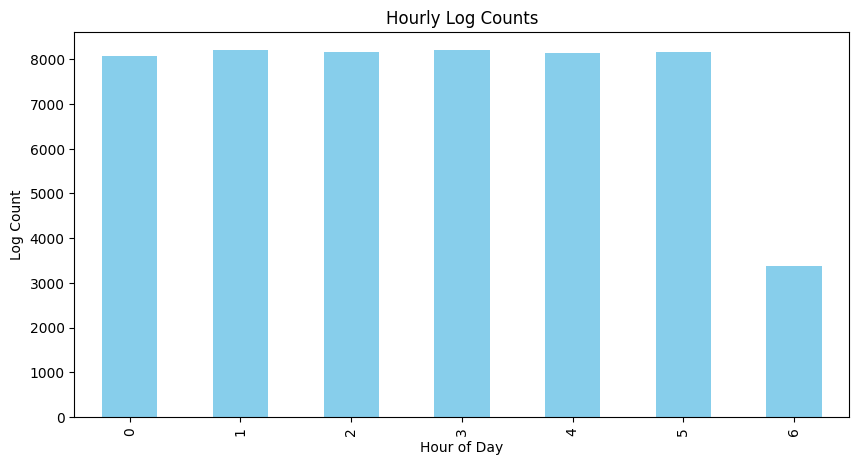


Most Frequent Words:
[('-', 130234), ('2017-05-16', 52326), ('INFO', 51431), ('-]', 48097), ('113d3a99c3da401fbd62cc2caa5b96d2', 28700), ('54fadb412c4e40cdbaed9335e4c35a9e', 28700), ('nova-api.log.1.2017-05-16_13:53:08', 27739), ('HTTP/1.1"', 26624), ('status:', 26624), ('len:', 26624)]

Entity Counts:
Total UUIDs: 49786
Total IP Addresses: 26624

Service-Level Log Counts:
nova: 52312
neutron: 0
cinder: 0
keystone: 3
glance: 0
swift: 0
heat: 0

Total Anomalous Logs: 26

Sample Anomalous Logs:
['nova-compute.log.1.2017-05-16_13:55:31 2017-05-16 03:19:45.356 2931 ERROR oslo_service.periodic_task [req-addc1839-2ed5-4778-b57e-5854eb7b8b09 - - - - -] Error during ComputeManager._run_image_cache_manager_pass\n', 'nova-compute.log.1.2017-05-16_13:55:31 2017-05-16 03:19:45.356 2931 ERROR oslo_service.periodic_task Traceback (most recent call last):\n', 'nova-compute.log.1.2017-05-16_13:55:31 2017-05-16 03:19:45.356 2931 ERROR oslo_service.periodic_task   File "/usr/lib/python2.7/dist-packages

In [ ]:
import os
import tarfile
import requests
import pandas as pd
import re
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Download and extract the TAR file
url = "https://zenodo.org/records/8196385/files/OpenStack.tar.gz?download=1"
output_dir = "/content/sample_data/OpenStack"
tar_path = "/content/OpenStack/OpenStack.tar.gz"

# Download TAR file
response = requests.get(url, stream=True)
os.makedirs("/content/OpenStack", exist_ok=True)
with open(tar_path, "wb") as file:
    for chunk in response.iter_content(chunk_size=1024):
        file.write(chunk)
print("Download completed.")

# Extract TAR file
os.makedirs(output_dir, exist_ok=True)
with tarfile.open(tar_path, "r:gz") as tar:
    tar.extractall(path=output_dir)
print("Extraction completed.")

# List extracted files
extracted_files = os.listdir(output_dir)
print("Extracted files:", extracted_files)

# File statistics
file_stats = []
for file_name in extracted_files:
    file_path = os.path.join(output_dir, file_name)
    if os.path.isfile(file_path):
        with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
            lines = f.readlines()
            line_count = len(lines)
            file_size = os.path.getsize(file_path) / 1024  # Size in KB
            sample_lines = lines[:5]  # Inspect first 5 lines
            file_stats.append({
                "file_name": file_name,
                "line_count": line_count,
                "file_size_kb": round(file_size, 2),
                "sample_lines": sample_lines
            })
df_stats = pd.DataFrame(file_stats)
print("\nFile Statistics:")
print(df_stats[["file_name", "line_count", "file_size_kb"]])

# Display sample lines from each file
for index, row in df_stats.iterrows():
    print(f"\nSample lines from {row['file_name']}:")
    for line in row["sample_lines"]:
        print(line.strip())

# Analyze log components in the first file
if not df_stats.empty:
    first_file_path = os.path.join(output_dir, df_stats.iloc[0]["file_name"])
    with open(first_file_path, "r", encoding="utf-8", errors="ignore") as f:
        logs = f.readlines()

    # Extract log levels
    log_levels = [re.search(r'\b(INFO|WARNING|ERROR|DEBUG|CRITICAL)\b', log) for log in logs]
    log_levels = [match.group(0) for match in log_levels if match]

    # Extract timestamps
    timestamps = [re.search(r'\b(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2})\b', log) for log in logs]
    timestamps = [datetime.strptime(match.group(1), '%Y-%m-%d %H:%M:%S') for match in timestamps if match]

    # Log Level Counts
    log_level_counts = pd.Series(log_levels).value_counts()
    print("\nLog Level Counts:")
    print(log_level_counts)

    # Time-based patterns
    df_timestamps = pd.DataFrame({'timestamp': timestamps})
    df_timestamps['hour'] = df_timestamps['timestamp'].dt.hour
    hourly_counts = df_timestamps['hour'].value_counts().sort_index()
    print("\nHourly Log Counts:")
    print(hourly_counts)

    # Plot hourly log counts
    plt.figure(figsize=(10, 5))
    hourly_counts.plot(kind='bar', color='skyblue', title='Hourly Log Counts')
    plt.xlabel('Hour of Day')
    plt.ylabel('Log Count')
    plt.show()

    # Frequent log messages
    word_counts = Counter(" ".join(logs).split())
    print("\nMost Frequent Words:")
    print(word_counts.most_common(10))

    # Entity Extraction
    uuids = [re.search(r'\b[0-9a-fA-F-]{36}\b', log).group(0) for log in logs if re.search(r'\b[0-9a-fA-F-]{36}\b', log)]
    ip_addresses = [re.search(r'\b\d{1,3}(?:\.\d{1,3}){3}\b', log).group(0) for log in logs if re.search(r'\b\d{1,3}(?:\.\d{1,3}){3}\b', log)]
    print("\nEntity Counts:")
    print(f"Total UUIDs: {len(uuids)}")
    print(f"Total IP Addresses: {len(ip_addresses)}")

    # Service-Level Statistics
    services = ['nova', 'neutron', 'cinder', 'keystone', 'glance', 'swift', 'heat']
    service_counts = {service: sum(1 for log in logs if service in log) for service in services}
    print("\nService-Level Log Counts:")
    for service, count in service_counts.items():
        print(f"{service}: {count}")

    # Anomaly Detection
    anomaly_keywords = ["failed", "timeout", "critical", "error"]
    anomalous_logs = [log for log in logs if any(keyword in log.lower() for keyword in anomaly_keywords)]
    print(f"\nTotal Anomalous Logs: {len(anomalous_logs)}")
    print("\nSample Anomalous Logs:")
    print(anomalous_logs[:5])


In [ ]:
normal_log_filename1 = "/content/sample_data/OpenStack/openstack_normal1.log"
normal_log_filename2 = "/content/sample_data/OpenStack/openstack_normal2.log"
abnormal_log_filename = "/content/sample_data/OpenStack/openstack_abnormal.log"

In [ ]:
with open(normal_log_filename1, 'r') as file:
    log_data = file.readlines()
normal_logs1 = [line.strip() for line in log_data if line.strip()]

with open(normal_log_filename2, 'r') as file:
    log_data = file.readlines()
normal_logs2 = [line.strip() for line in log_data if line.strip()]

normal_logs = normal_logs1 + normal_logs2

with open(abnormal_log_filename, 'r') as file:
    log_data = file.readlines()
abnormal_logs = [line.strip() for line in log_data if line.strip()]

In [ ]:
import re

def clean_and_normalize_log(logs):
    cleaned_logs = []
    log_line_pattern = r""" (?P<log_file>[\w-]+\.log\.\d{4}-\d{2}-\d{2}_\d{2}:\d{2}:\d{2})\s (?P<log_timestamp>\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}:\d{2}\.\d{3})\s (?P<pid>\d+)\s (?P<level>\w+)\s (?P<logger>[\w\.]+)\s \[(?P<req_id>req-[\w-]+)\s-\s-\s-\s-\s-\] \s (?P<message>.*) """

    for log in logs:
        match = re.match(log_line_pattern, log.strip(), re.VERBOSE)
        if match:
          log_data = match.groupdict()
          cleaned_logs.append(log_data.get("message"))
    return cleaned_logs

normal = clean_and_normalize_log(normal_logs)
abnormal = clean_and_normalize_log(abnormal_logs)

In [ ]:
import pandas as pd

data = []
for log in normal:
    data.append({"log": log.strip(), "label": 0})  # 0 for normal
for log in abnormal:
    data.append({"log": log.strip(), "label": 1})  # 1 for abnormal

# Create DataFrame
df_logs = pd.DataFrame(data)

# Print the first few rows
print(df_logs.head())

# Generate label counts
label_counts = df_logs['label'].value_counts()

# Display label counts
print("\nLabel Counts:")
print(label_counts)

# Optional: Label counts with descriptions
print("\nDetailed Label Counts:")
print(f"Normal logs (label=0): {label_counts.get(0, 0)}")
print(f"Abnormal logs (label=1): {label_counts.get(1, 0)}")



                                                 log  label
0  image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at ...      0
1  image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at ...      0
2  Active base files: /var/lib/nova/instances/_ba...      0
3  [instance: 96c58299-fc8f-4be0-942e-8bcf0943176...      0
4  [instance: 96c58299-fc8f-4be0-942e-8bcf0943176...      0

Label Counts:
label
0    13662
1     5936
Name: count, dtype: int64

Detailed Label Counts:
Normal logs (label=0): 13662
Abnormal logs (label=1): 5936


In [ ]:
from drain3 import TemplateMiner
from drain3.template_miner_config import TemplateMinerConfig

# Initialize Drain
config = TemplateMinerConfig()
template_miner = TemplateMiner(config=config)

# Parse logs and generate structured templates
log_sequences = []
template_ids = []

for log in df_logs["log"]:
    result = template_miner.add_log_message(log)
    log_sequences.append(result["template_mined"])
    template_ids.append(result["cluster_id"])

# Add parsed templates and IDs to DataFrame
df_logs["template"] = log_sequences
df_logs["template_id"] = template_ids

print(df_logs.head())

                                                 log  label  \
0  image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at ...      0   
1  image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at ...      0   
2  Active base files: /var/lib/nova/instances/_ba...      0   
3  [instance: 96c58299-fc8f-4be0-942e-8bcf0943176...      0   
4  [instance: 96c58299-fc8f-4be0-942e-8bcf0943176...      0   

                                            template  template_id  
0  image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at ...            1  
1  image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at ...            2  
2  Active base files: /var/lib/nova/instances/_ba...            3  
3  [instance: 96c58299-fc8f-4be0-942e-8bcf0943176...            4  
4  [instance: 96c58299-fc8f-4be0-942e-8bcf0943176...            5  


In [ ]:
from sklearn.model_selection import train_test_split

# Convert template IDs to sequences for LogBERT
df_logs["sequence"] = df_logs["template_id"].astype(str)  # Use template IDs as sequence

# Train-test split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_logs["sequence"].tolist(),
    df_logs["label"].tolist(),
    test_size=0.2,
    random_state=42
)

In [ ]:
from transformers import BertTokenizer
from torch.utils.data import Dataset

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

class LogDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.long),
        }

# Create datasets
train_dataset = LogDataset(train_texts, train_labels, tokenizer)
val_dataset = LogDataset(val_texts, val_labels, tokenizer)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
from transformers import BertForSequenceClassification
from torch.utils.data import DataLoader
import torch

# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.to(device)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# Training loop
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3, Loss: 0.4082
Epoch 2/3, Loss: 0.3912
Epoch 3/3, Loss: 0.3911


In [ ]:
from sklearn.metrics import accuracy_score

# Validation loop
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.8520


Validation Accuracy: 0.8520

Confusion Matrix:
[[2729    3]
 [ 577  611]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.83      1.00      0.90      2732
   Anomalous       1.00      0.51      0.68      1188

    accuracy                           0.85      3920
   macro avg       0.91      0.76      0.79      3920
weighted avg       0.88      0.85      0.84      3920



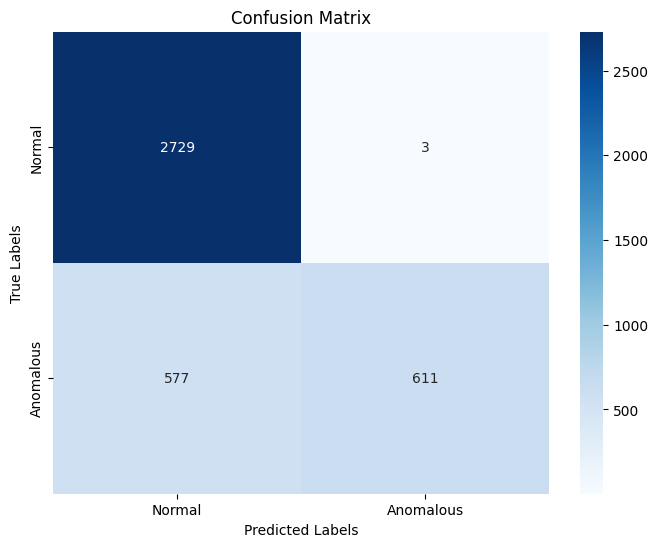

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Validation loop
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Validation Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(all_labels, all_preds, target_names=["Normal", "Anomalous"])
print("\nClassification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Anomalous"], yticklabels=["Normal", "Anomalous"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
model.save_pretrained("log_anomaly_detection_model")
tokenizer.save_pretrained("log_anomaly_detection_model")

('log_anomaly_detection_model/tokenizer_config.json',
 'log_anomaly_detection_model/special_tokens_map.json',
 'log_anomaly_detection_model/vocab.txt',
 'log_anomaly_detection_model/added_tokens.json')

In [ ]:
import torch
import torch.nn.functional as F
from transformers import BertForSequenceClassification, BertTokenizer

# Function to predict whether a log sequence is anomalous or normal
def predict(sequence, model, tokenizer):
    model.eval()
    tokens = tokenizer(
        sequence,  # Sequence should be a single string
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )
    with torch.no_grad():
        outputs = model(
            input_ids=tokens['input_ids'],
            attention_mask=tokens['attention_mask']
        )
        probabilities = F.softmax(outputs.logits, dim=1)
        prediction = torch.argmax(probabilities, dim=1).item()
    return prediction

# Load the model and tokenizer
model = BertForSequenceClassification.from_pretrained("log_anomaly_detection_model")
tokenizer = BertTokenizer.from_pretrained("log_anomaly_detection_model")

# Test log sequences
test_normal_log_sequence = (
    "image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at (/var/lib/nova/instances/_base/a489c868f0c37da93b76227c91bb03908ac0e742): "
    "in use: on this node 1 local, 0 on other nodes sharing this instance storage"
)
prediction = predict(test_normal_log_sequence, model, tokenizer)
print("Anomaly" if prediction == 1 else "Normal")

test_anomalous_log_sequence = (
    "Error: Instance 0673dd71-34c5-4fbb-86c4-40623fbe45b4 failed to launch due to insufficient storage."
)
prediction = predict(test_anomalous_log_sequence, model, tokenizer)
print("Anomaly" if prediction == 1 else "Normal")


Normal
Normal


In [ ]:
!pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.54.4
    Uninstalling openai-1.54.4:
      Successfully uninstalled openai-1.54.4


In [ ]:
import torch
import torch.nn.functional as F
from transformers import BertForSequenceClassification, BertTokenizer
import openai
import os
from google.colab import userdata

# Initialize OpenAI API
OPENAI_API_KEY = userdata.get('OA_API')
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")
if not openai.api_key:
    raise ValueError("OpenAI API key is not set. Please configure the API key.")

# Function to predict whether a log sequence is anomalous or normal
def predict(sequence, model, tokenizer):
    """
    Predicts if the given log sequence is Anomalous (1) or Normal (0).
    """
    model.eval()
    tokens = tokenizer(
        sequence,
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )
    with torch.no_grad():
        outputs = model(
            input_ids=tokens['input_ids'],
            attention_mask=tokens['attention_mask']
        )
        probabilities = F.softmax(outputs.logits, dim=1)
        prediction = torch.argmax(probabilities, dim=1).item()
    return prediction

# Function to perform root cause analysis using OpenAI LLM
def root_cause_analysis(log_message):
    """
    Sends the anomaly log to OpenAI LLM for a detailed RCA.
    """
    try:
        prompt = f"""
        You are an expert in IT operations and log analysis. Analyze the following log anomaly and provide a detailed root cause analysis:

        Log anomaly:
        {log_message}

        Root Cause Analysis:
        """
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a root cause analysis expert."},
                {"role": "user", "content": prompt},
            ],
            temperature=0.2,  # Low temperature for consistent output
            max_tokens=300
        )
        return response['choices'][0]['message']['content'].strip()
    except Exception as e:
        return f"Error during RCA generation: {e}"

# Load the pre-trained model and tokenizer
model = BertForSequenceClassification.from_pretrained("log_anomaly_detection_model")
tokenizer = BertTokenizer.from_pretrained("log_anomaly_detection_model")

# Test log sequence
test_log_sequence = (
    "Error: Instance 0673dd71-34c5-4fbb-86c4-40623fbe45b4 failed to launch due to insufficient storage."
)

# Predict if the log is anomalous
prediction = predict(test_log_sequence, model, tokenizer)
if prediction == 1:  # Anomalous
    print("Prediction: Anomaly detected.")
    # Perform RCA for the anomaly
    rca_result = root_cause_analysis(test_log_sequence)
    print("Detailed RCA:\n", rca_result)
else:
    print("Prediction: Normal log.")


Prediction: Normal log.


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 120.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import torch
import torch.nn.functional as F
from transformers import BertForSequenceClassification, BertTokenizer
import openai
import gradio as gr
from google.colab import userdata
import os


# Initialize OpenAI API
OPENAI_API_KEY = userdata.get('OA_API')
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")
if not openai.api_key:
    raise ValueError("OpenAI API key is not set. Please configure the API key.") # Replace with your OpenAI API key

# Load the pre-trained model and tokenizer
model = BertForSequenceClassification.from_pretrained("log_anomaly_detection_model")
tokenizer = BertTokenizer.from_pretrained("log_anomaly_detection_model")

# Function to predict whether a log sequence is anomalous or normal
def predict(sequence, model, tokenizer):
    """
    Predicts if the given log sequence is Anomalous (1) or Normal (0).
    """
    model.eval()
    tokens = tokenizer(
        sequence,
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )
    with torch.no_grad():
        outputs = model(
            input_ids=tokens['input_ids'],
            attention_mask=tokens['attention_mask']
        )
        probabilities = F.softmax(outputs.logits, dim=1)
        prediction = torch.argmax(probabilities, dim=1).item()
    return prediction

# Function to perform root cause analysis using OpenAI LLM
def root_cause_analysis(log_message):
    """
    Sends the anomaly log to OpenAI LLM for a detailed RCA.
    """
    try:
        prompt = f"""
        You are an expert in IT operations and log analysis. Analyze the following log anomaly and provide a detailed root cause analysis:

        Log anomaly:
        {log_message}

        Root Cause Analysis:
        """
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a root cause analysis expert."},
                {"role": "user", "content": prompt},
            ],
            temperature=0.2,  # Low temperature for consistent output
            max_tokens=300
        )
        return response['choices'][0]['message']['content'].strip()
    except Exception as e:
        return f"Error during RCA generation: {e}"

# Gradio interface function
def analyze_log(log_message):
    """
    Classifies the log as normal or anomaly and generates RCA for anomalies.
    """
    prediction = predict(log_message, model, tokenizer)
    if prediction == 1:  # Anomalous
        rca_result = root_cause_analysis(log_message)
        return "Anomaly Detected", rca_result
    else:
        return "Normal Log", "No RCA required for normal logs."

# Create Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("### Log Analysis and RCA")

    with gr.Row():
        log_input = gr.Textbox(label="Log Message", placeholder="Enter a log message", lines=3)

    with gr.Row():
        submit_button = gr.Button("Analyze Log")

    with gr.Row():
        prediction_output = gr.Textbox(label="Log Classification", interactive=False)
        rca_output = gr.Textbox(label="Root Cause Analysis", interactive=False)

    # Connect function to Gradio components
    submit_button.click(analyze_log, inputs=log_input, outputs=[prediction_output, rca_output])

# Launch the app
demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7abf03479d44fcbdca.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import torch
import torch.nn.functional as F
from transformers import BertForSequenceClassification, BertTokenizer
import openai
import gradio as gr
from google.colab import userdata
import os

# Initialize OpenAI API
OPENAI_API_KEY = userdata.get('OA_API')
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")
if not openai.api_key:
    raise ValueError("OpenAI API key is not set. Please configure the API key.") # Replace with your OpenAI API key

# Load the pre-trained model and tokenizer
model = BertForSequenceClassification.from_pretrained("log_anomaly_detection_model")
tokenizer = BertTokenizer.from_pretrained("log_anomaly_detection_model")

# Function to predict whether a log sequence is anomalous or normal
def predict(sequence, model, tokenizer, threshold=0.7):
    """
    Predicts if the given log sequence is Anomalous (1) or Normal (0) using a confidence threshold.
    """
    model.eval()
    tokens = tokenizer(
        sequence,
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )
    with torch.no_grad():
        outputs = model(
            input_ids=tokens['input_ids'],
            attention_mask=tokens['attention_mask']
        )
        probabilities = F.softmax(outputs.logits, dim=1)
        anomaly_score = probabilities[0][1].item()  # Probability of anomaly (class 1)
        print(f"Anomaly Score: {anomaly_score}")  # Debugging

        if anomaly_score >= threshold:
            return 1  # Anomalous
        else:
            return 0  # Normal

# Function to perform root cause analysis using OpenAI LLM
def root_cause_analysis(log_message):
    """
    Sends the anomaly log to OpenAI LLM for a detailed RCA.
    """
    try:
        prompt = f"""
        You are an expert in IT operations and log analysis. Analyze the following log anomaly and provide a detailed root cause analysis:

        Log anomaly:
        {log_message}

        Root Cause Analysis:
        """
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a root cause analysis expert."},
                {"role": "user", "content": prompt},
            ],
            temperature=0.2,  # Low temperature for consistent output
            max_tokens=300
        )
        return response['choices'][0]['message']['content'].strip()
    except Exception as e:
        return f"Error during RCA generation: {e}"

# Gradio interface function
def analyze_log(log_message):
    """
    Classifies the log as normal or anomaly and generates RCA for anomalies.
    """
    prediction = predict(log_message, model, tokenizer)
    if prediction == 1:  # Anomalous
        rca_result = root_cause_analysis(log_message)
        return "Anomaly Detected", rca_result
    else:
        return "Normal Log", "No RCA required for normal logs."

# Create Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("### Log Analysis and RCA")

    with gr.Row():
        log_input = gr.Textbox(label="Log Message", placeholder="Enter a log message", lines=3)

    with gr.Row():
        submit_button = gr.Button("Analyze Log")

    with gr.Row():
        prediction_output = gr.Textbox(label="Log Classification", interactive=False)
        rca_output = gr.Textbox(label="Root Cause Analysis", interactive=False)

    # Connect function to Gradio components
    submit_button.click(analyze_log, inputs=log_input, outputs=[prediction_output, rca_output])

# Launch the app
demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0ed6fa7e5f4d4cc88f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import pandas as pd
import openai
from google.colab import userdata
import os

# Initialize OpenAI API
OPENAI_API_KEY = userdata.get('OA_API')
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")
if not openai.api_key:
    raise ValueError("OpenAI API key is not set. Please configure the API key.") # Replace with your OpenAI API key


# Function to classify logs and perform RCA
def process_logs(file):
    """
    Processes the uploaded .log file, classifies each log as normal or anomaly using OpenAI,
    and generates RCA for anomalies.
    """
    # Read the uploaded file
    try:
        with open(file.name, "r") as f:
            logs = f.readlines()
    except Exception as e:
        return None, f"Error reading file: {e}"

    data = []
    rca_results = []

    # Loop through each log
    for log in logs:
        log = log.strip()  # Remove leading/trailing whitespace
        if not log:
            continue  # Skip empty lines

        # Use OpenAI LLM to classify the log
        try:
            response = openai.ChatCompletion.create(
                model="gpt-3.5-turbo",
                messages=[
                    {"role": "system", "content": "You are an expert in IT log analysis."},
                    {
                        "role": "user",
                        "content": f"Classify the following log as 'Normal' or 'Anomalous':\n{log}"
                    },
                ],
                temperature=0.2,
                max_tokens=50,
            )
            classification = response["choices"][0]["message"]["content"].strip()

        except Exception as e:
            classification = f"Error: {e}"

        # Append to data
        data.append({"log": log, "classification": classification})

        # If anomalous, generate RCA
        if classification == "Anomalous":
            try:
                rca_response = openai.ChatCompletion.create(
                    model="gpt-3.5-turbo",
                    messages=[
                        {"role": "system", "content": "You are an expert in IT root cause analysis."},
                        {
                            "role": "user",
                            "content": f"Provide a detailed root cause analysis for the following anomalous log:\n{log}",
                        },
                    ],
                    temperature=0.2,
                    max_tokens=300,
                )
                rca = rca_response["choices"][0]["message"]["content"].strip()
            except Exception as e:
                rca = f"Error during RCA generation: {e}"

            rca_results.append({"log": log, "root_cause_analysis": rca})

    # Create a DataFrame for logs and RCA results
    df_logs = pd.DataFrame(data)
    df_rca = pd.DataFrame(rca_results)

    # Save RCA results to a CSV file
    output_csv = "/content/rca_results.csv"
    df_rca.to_csv(output_csv, index=False)

    return df_logs, output_csv

# Gradio UI
def gradio_interface(file):
    df_logs, rca_csv = process_logs(file)
    if df_logs is None:
        return "Error processing file.", None

    # Display classification results
    log_summary = df_logs.to_markdown(index=False)

    # Return log summary and CSV file for download
    return log_summary, rca_csv

# Gradio app
with gr.Blocks() as demo:
    gr.Markdown("### Log Classification and RCA Generator")
    gr.Markdown(
        "Upload a `.log` file containing normal and anomalous logs. "
        "The app will classify the logs and generate a CSV with Root Cause Analysis for anomalies."
    )

    with gr.Row():
        log_file = gr.File(label="Upload .log File")

    with gr.Row():
        submit_button = gr.Button("Analyze Logs")

    with gr.Row():
        classification_output = gr.Textbox(label="Log Classification Results", lines=15, interactive=False)
        download_link = gr.File(label="Download RCA CSV")

    submit_button.click(gradio_interface, inputs=log_file, outputs=[classification_output, download_link])

# Launch the app
demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://92b4e1d7e0b9f7e1db.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
